# My Tesla model Y performance. Now that we have seen the application of the least-squares regression line in action, lets put it to the test. Here are more data (data is plural).

In [1]:
data = {
    "time": [0, 12, 20, 28, 0, 7, 15, 20, 30, 32, 0, 6, 13, 18, 29, 35, 40, 0, 7, 18, 31, 0, 6, 11, 17, 23],
    "battery_percent" : [51, 70, 81, 90, 32, 50, 66, 75, 88, 90, 12, 33, 52, 62, 78, 85, 90, 36, 51, 72, 90, 30, 46, 58, 70, 80]
}

In [2]:
import pandas as pd

<ipython-input-2-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,time,battery_percent
0,0,51
1,12,70
2,20,81
3,28,90
4,0,32


Let us now visualize the scatterplot

In [8]:
import matplotlib.pyplot as plt


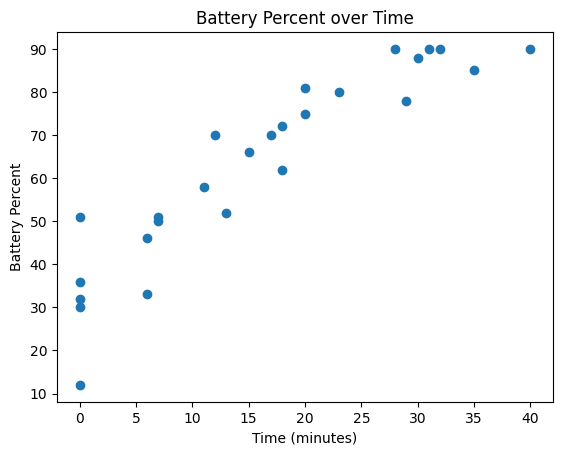

In [17]:
plt.scatter(df['time'], df['battery_percent'])

plt.xlabel('Time (minutes)')
plt.ylabel('Battery Percent')
plt.title('Battery Percent over Time')
plt.show()

Recall from the previous takehome that the scatterplot indicates more of a exponential relationship than a linear relationship.  To construct an exponential relationship let us create a new column in the dataframe by taking the natural log of the battery_percent column

In [19]:
import numpy as np

df['log_battery_percent'] = np.log(df['battery_percent'])

In [20]:
print(df)

    time  battery_percent  log_battery_percent
0      0               51             3.931826
1     12               70             4.248495
2     20               81             4.394449
3     28               90             4.499810
4      0               32             3.465736
5      7               50             3.912023
6     15               66             4.189655
7     20               75             4.317488
8     30               88             4.477337
9     32               90             4.499810
10     0               12             2.484907
11     6               33             3.496508
12    13               52             3.951244
13    18               62             4.127134
14    29               78             4.356709
15    35               85             4.442651
16    40               90             4.499810
17     0               36             3.583519
18     7               51             3.931826
19    18               72             4.276666
20    31     

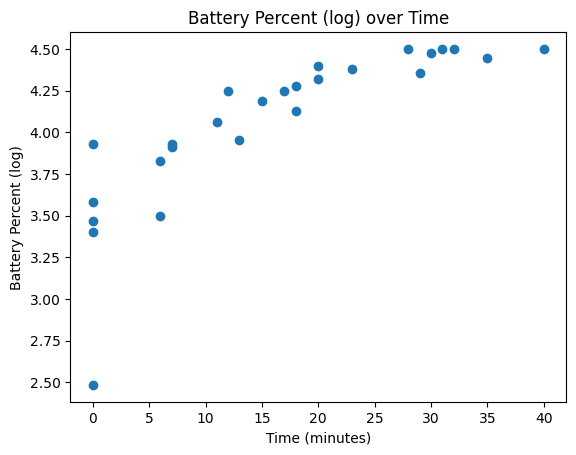

In [21]:
plt.scatter(df['time'], df['log_battery_percent'])

plt.xlabel('Time (minutes)')
plt.ylabel('Battery Percent (log)')
plt.title('Battery Percent (log) over Time')
plt.show()

By apply the natural log to the battery percent column the values are 'straightened out' so the scatterplot becomes more linear.  And thus our regression equations can be applied.

$$
\left\{ \begin{array}{ll}
nb + (\sum x) m = \sum y & \\
& \\
(\sum x) b + (\sum x^2) m = \sum xy & 
\end{array} \right.
$$

In [23]:
sum_x = df['time'].sum()
sum_y = df['log_battery_percent'].sum()
sum_xy = (df['time'] * df['log_battery_percent']).sum()
sum_x_squared = (df['time'] ** 2).sum()
n = len(df)

print(f"Sum of x (time): {sum_x}")
print(f"Sum of y (battery_percent): {sum_y}")
print(f"Sum of xy: {sum_xy}")
print(f"Sum of x^2: {sum_x_squared}")
print(f"Number of data points (n): {n}")

Sum of x (time): 418
Sum of y (battery_percent): 105.5082140427143
Sum of xy: 1812.8663470557426
Sum of x^2: 10430
Number of data points (n): 26


$$
\left\{ \begin{array}{ll}
26b + 418 m = 105.508 & \\
& \\
418 b + 10430 m = 1812.866 & 
\end{array} \right.
$$

In [24]:
# Using Cramer's Rule

D = 26*10430 - 418*418

Db = 105.508*10430 - 418*1812.866

Dm = 26*1812.866 - 105.508*418

b = Db / D

m = Dm / D

print(D, Db, Dm, b, m)

96456 342670.45199999993 3032.172000000006 3.552608982333913 0.03143580492659872


Our linear regression equation is given by $y=0.0314 x + 3.5526$, or in context $\ln B(t)=0.0314 t +3.5526$.

Thus our exponential regression equation becomes $B(t) = e^(0.0314t+3.5526) = 34.9 e^{0.0314t}$

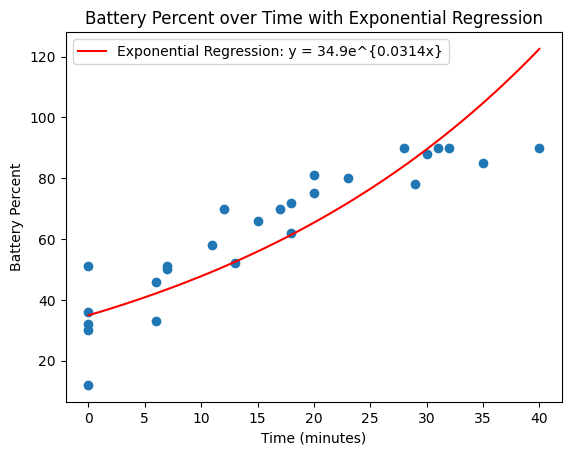

In [27]:
plt.scatter(df['time'], df['battery_percent'])

a = 34.9
b = 0.0314

x_values = np.linspace(min(data['time']), max(data['time']), 100)
y_values = a * np.exp(b * x_values)

plt.plot(x_values, y_values, color='red', label='Exponential Regression: y = 34.9e^{0.0314x}')


plt.xlabel('Time (minutes)')
plt.ylabel('Battery Percent')
plt.title('Battery Percent over Time with Exponential Regression')
plt.legend()
plt.show()

In [28]:
times = [0, 7, 15, 20, 25]

predicted_battery_percent = [a*np.exp(b*t) for t in times]

predictions = dict(zip(times, predicted_battery_percent))
for time, prediction in predictions.items():
    print(f"At time {time}: Predicted Battery Percent = {prediction:.2f}%")

At time 0: Predicted Battery Percent = 34.90%
At time 7: Predicted Battery Percent = 43.48%
At time 15: Predicted Battery Percent = 55.90%
At time 20: Predicted Battery Percent = 65.40%
At time 25: Predicted Battery Percent = 76.52%


### Strengths and weakness of the model.

some of the strenghts of this model
- captures the 'curviness' of the data
- captures the non-constant rate of increase of battery percent

some of the weakness of this model
- the model visually seems reasonable, but the points form an exponential shape
- the model is not realistic because after the 35th minutes the prediction is that the battery will be more than 100% full